In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data = data[['Date', 'Anomoulous melting area']]
print(data)


import torch

device = None
if torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)


from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Anomoulous melting area(t-{i})'] = df['Anomoulous melting area'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
print(shifted_df)


shifted_df_as_np = shifted_df.to_numpy()

print(shifted_df_as_np)




from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

print(shifted_df_as_np)


X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

print(X.shape, y.shape)


X = dc(np.flip(X, axis=1))
print(X)

          Date  Anomoulous melting area
0     20000102                     1354
1     20000103                     1346
2     20000104                      750
3     20000105                     1768
4     20000106                      921
...        ...                      ...
8373  20221227                      694
8374  20221228                      847
8375  20221229                     1345
8376  20221230                      808
8377  20221231                      479

[8378 rows x 2 columns]
mps
          Anomoulous melting area  Anomoulous melting area(t-1)  \
Date                                                              
20000109                      907                        1443.0   
20000110                      899                         907.0   
20000111                      643                         899.0   
20000112                     1020                         643.0   
20000113                      778                        1020.0   
...                   

          Date  Anomoulous melting area
0     20000102                     1354
1     20000103                     1346
2     20000104                      750
3     20000105                     1768
4     20000106                      921
...        ...                      ...
8373  20221227                      694
8374  20221228                      847
8375  20221229                     1345
8376  20221230                      808
8377  20221231                      479

[8378 rows x 2 columns]


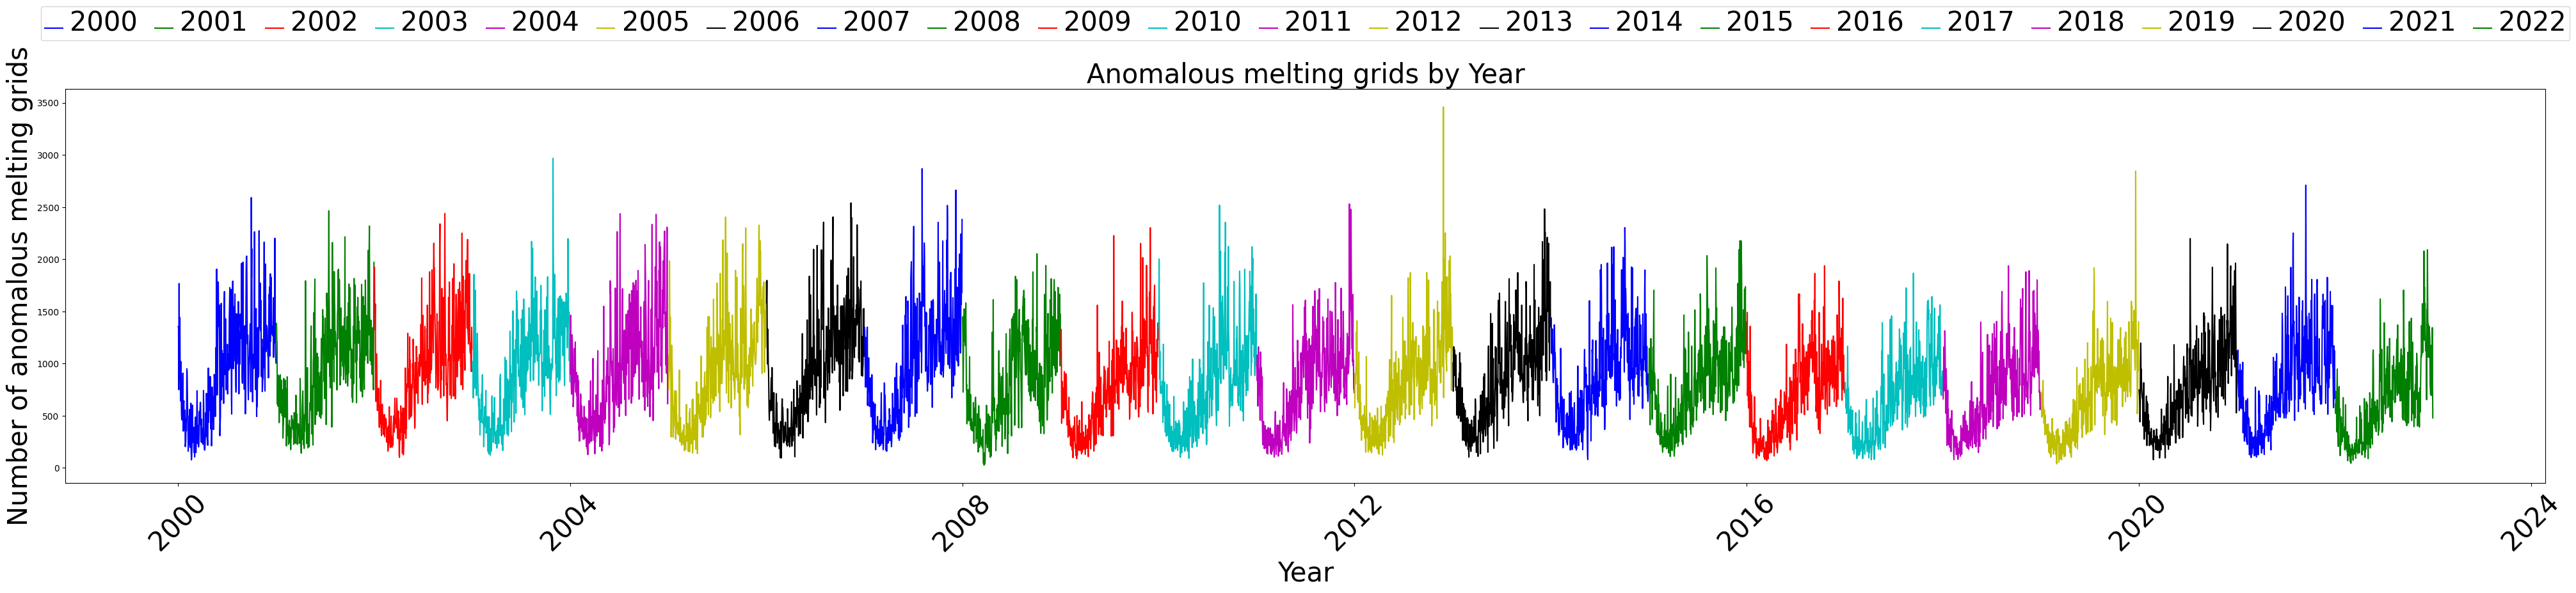

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data = data[['Date', 'Anomoulous melting area']]
print(data)


df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['year'] = df['date'].dt.year

# Group the data by year
grouped = df.groupby('year')

# Set up a unique color for each year
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b','g']

# Create a plot for each year
for year, group in grouped:
    plt.plot(group['date'], group['Anomoulous melting area'], label=str(year), color=colors[year - df['year'].min()])

# Customize the plot
plt.xlabel('Year',fontsize = 30)
plt.ylabel('Number of anomalous melting grids', fontsize = 30)
plt.title('Anomalous melting grids by Year', fontsize=30)

# Rotate the x-axis date labels for better readability
plt.xticks(rotation=45, fontsize=30)  # Adjust the fontsize as needed

# Create a larger figure
fig = plt.gcf()
fig.set_size_inches(50, 8)  # Adjust the size as needed

# Customize the legend with a bold fontweight
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.221), ncol=len(grouped))
for text in legend.get_texts():
    text.set_fontsize(30)





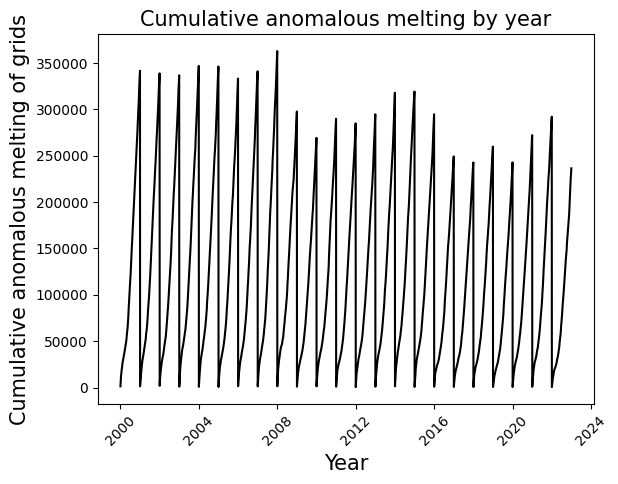

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')

# Assuming your data contains a 'Date' column and an 'Anomoulous melting area' column

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Group the data by year and calculate the cumulative sum
data['Cumulative Melting'] = data.groupby(data['Date'].dt.year)['Anomoulous melting area'].cumsum()

# Create a plot
plt.plot(data['Date'], data['Cumulative Melting'], label='Cumulative Melting', color='black')

# Customize the plot

font_point = 15
plt.xlabel('Year', fontsize=font_point)
plt.ylabel('Cumulative anomalous melting of grids', fontsize=font_point)
plt.title('Cumulative anomalous melting by year', fontsize=font_point)

# Rotate the x-axis date labels for better readability
plt.xticks(rotation=45)


plt.show()


['2000-01-02T00:00:00.000000000' '2000-01-03T00:00:00.000000000'
 '2000-01-04T00:00:00.000000000' ... '2022-12-29T00:00:00.000000000'
 '2022-12-30T00:00:00.000000000' '2022-12-31T00:00:00.000000000']


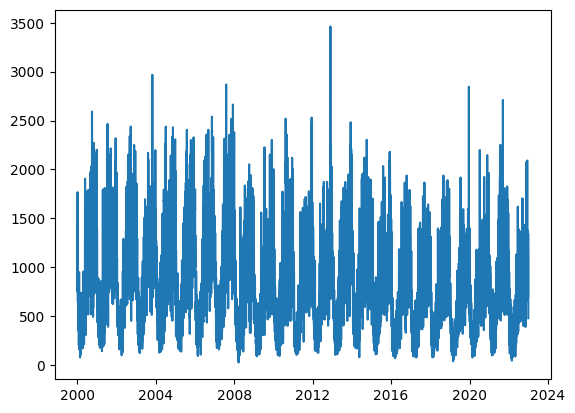

In [37]:
#data['Date'] = pd.to_datetime(data['Date'])

print(data['Date'].values)

plt.plot(data['Date'], data['Anomoulous melting area'])

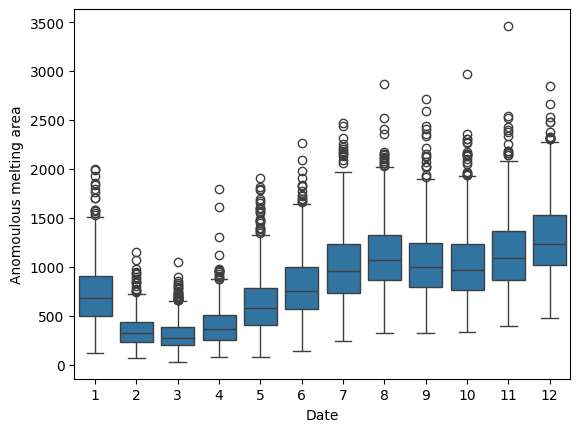

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is loaded as 'data' DataFrame
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Now, you can use the .dt accessor
sns.boxplot(x=data['Date'].dt.month, y=data['Anomoulous melting area'])
plt.show()


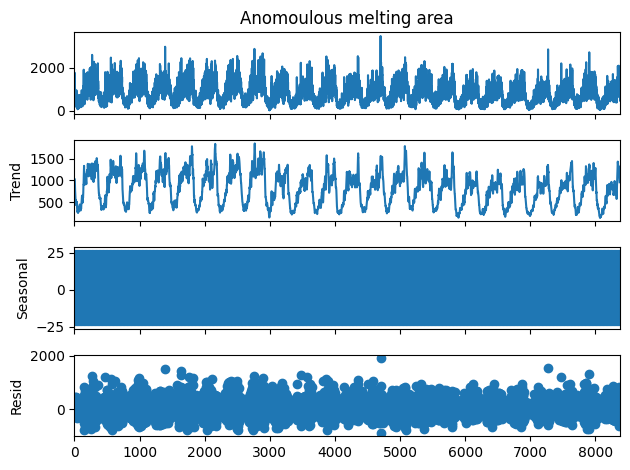

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify the seasonal period based on your data
seasonal_period = 12  # Example: assuming monthly data for a year

result = seasonal_decompose(data['Anomoulous melting area'], model='additive', period=seasonal_period)
result.plot()
plt.show()


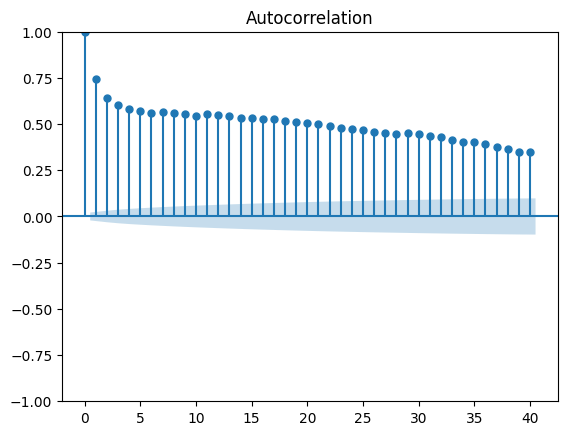

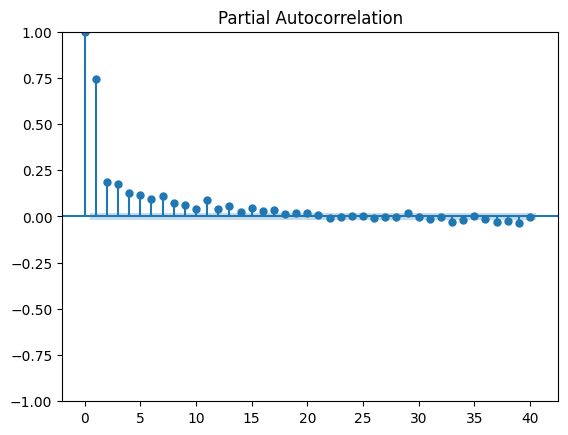

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Anomoulous melting area'])
plot_pacf(data['Anomoulous melting area'])
plt.show()


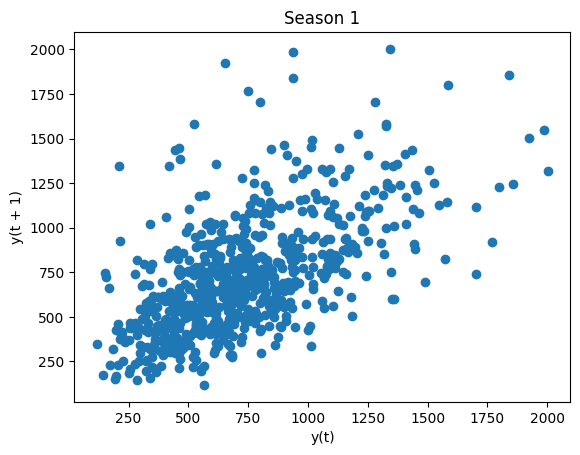

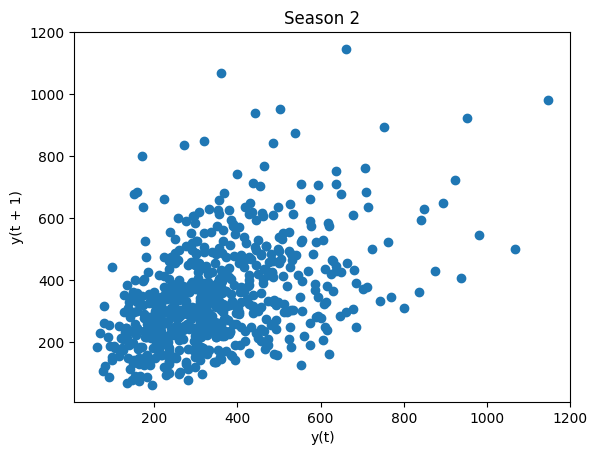

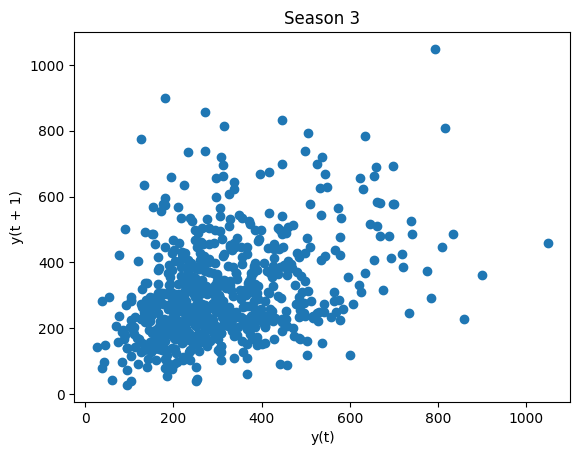

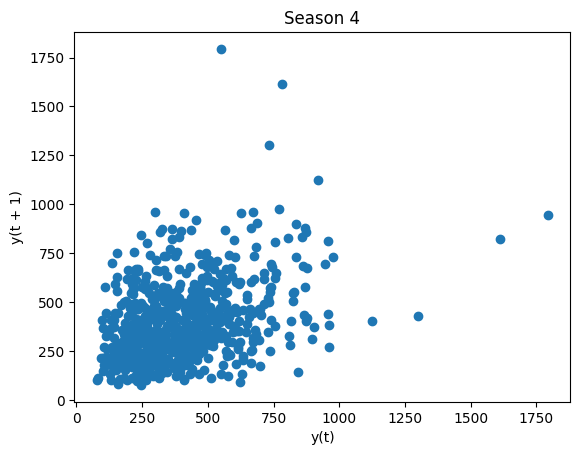

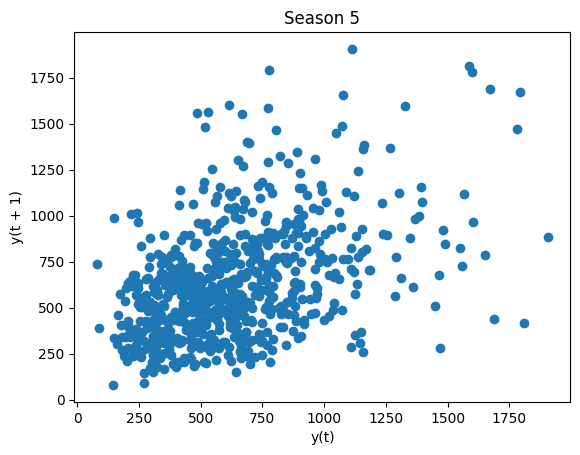

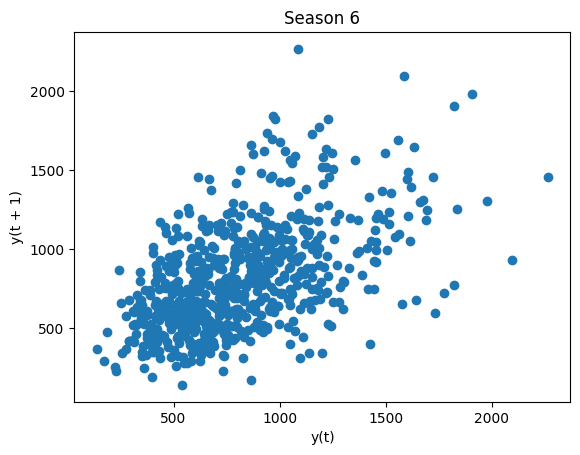

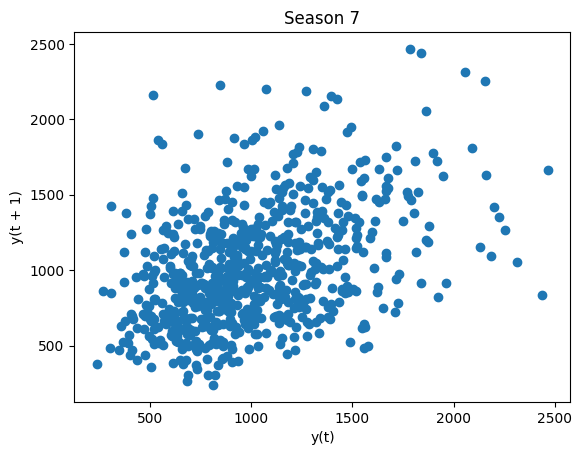

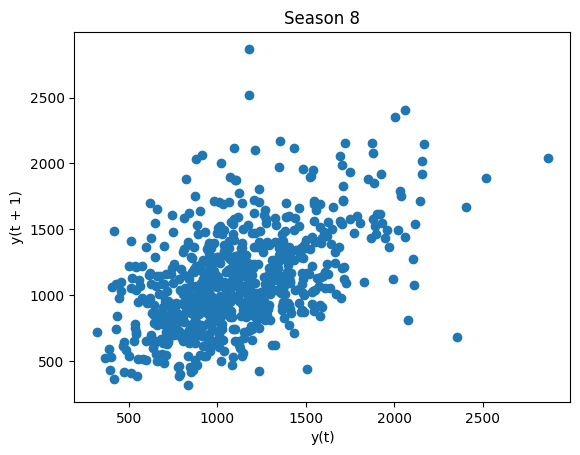

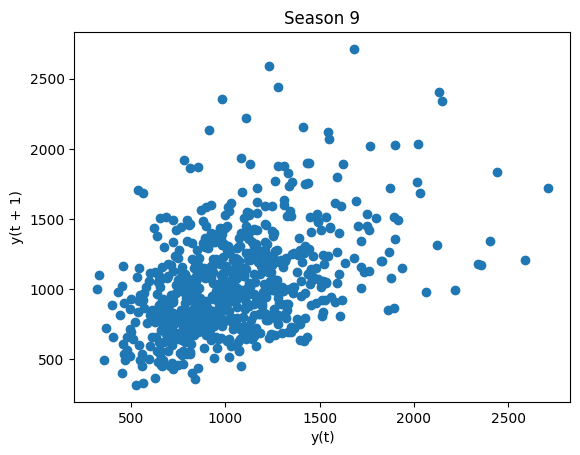

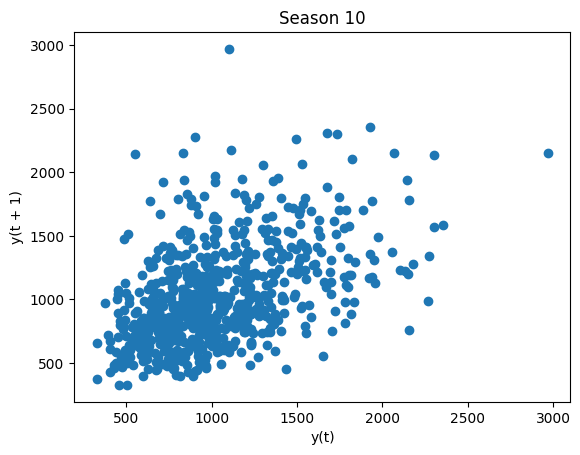

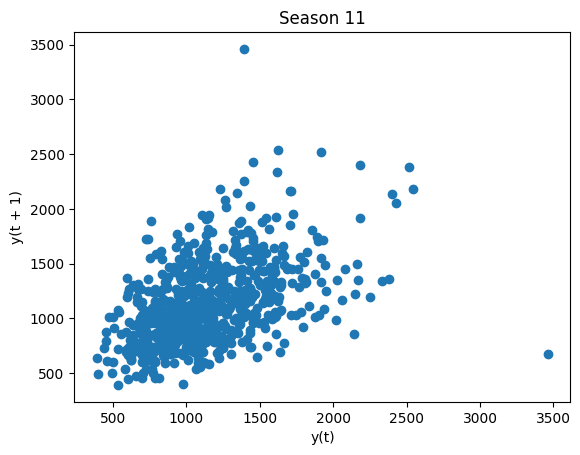

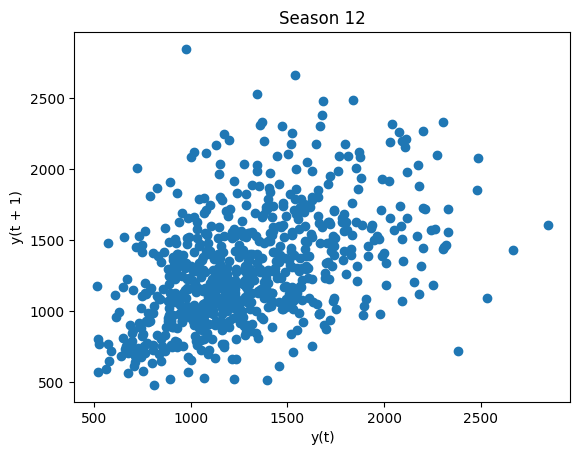

In [41]:
from pandas.plotting import lag_plot

for i in range(1, 12+1):
    plt.figure()
    lag_plot(data[data['Date'].dt.month == i]['Anomoulous melting area'])
    plt.title(f'Season {i}')
    plt.show()


In [42]:
split_index = 5827

split_index

5827

In [43]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5827, 7), (2544, 7), (5827,), (2544,))

In [44]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5827, 7, 1), (2544, 7, 1), (5827, 1), (2544, 1))

In [45]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([5827, 7, 1]),
 torch.Size([2544, 7, 1]),
 torch.Size([5827, 1]),
 torch.Size([2544, 1]))

In [46]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [47]:
train_dataset

In [48]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [49]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [50]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [51]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train_one_epoch(epoch):
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [52]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [53]:


for epoch in range(num_epochs):
    train_one_epoch(epoch)
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.071
Batch 200, Loss: 0.055
Batch 300, Loss: 0.036

Val Loss: 0.024
***************************************************

Epoch: 2
Batch 100, Loss: 0.033
Batch 200, Loss: 0.031
Batch 300, Loss: 0.035

Val Loss: 0.023
***************************************************

Epoch: 3
Batch 100, Loss: 0.030
Batch 200, Loss: 0.034
Batch 300, Loss: 0.033

Val Loss: 0.023
***************************************************

Epoch: 4
Batch 100, Loss: 0.031
Batch 200, Loss: 0.032
Batch 300, Loss: 0.032

Val Loss: 0.022
***************************************************

Epoch: 5
Batch 100, Loss: 0.030
Batch 200, Loss: 0.033
Batch 300, Loss: 0.032

Val Loss: 0.022
***************************************************

Epoch: 6
Batch 100, Loss: 0.033
Batch 200, Loss: 0.030
Batch 300, Loss: 0.030

Val Loss: 0.022
***************************************************

Epoch: 7
Batch 100, Loss: 0.031
Batch 200, Loss: 0.031
Batch 300, Loss: 0.029

Val Loss: 0.022
*****************

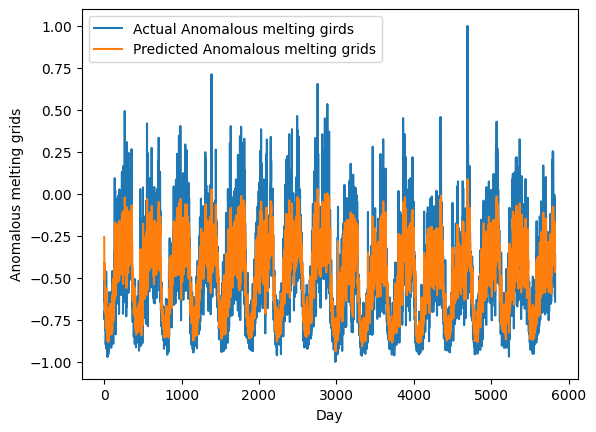

In [54]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Anomalous melting girds')
plt.plot(predicted, label='Predicted Anomalous melting grids')
plt.xlabel('Day')
plt.ylabel('Anomalous melting grids')
plt.legend()
plt.show()


In [55]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([1304.46700399, 1030.52887139, 1038.02099374, ...,  946.00120653,
        974.58374646, 1115.5942398 ])

In [56]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 907.00001393,  898.99997798,  642.99995345, ...,  758.99998856,
       1125.99999373,  642.99995345])

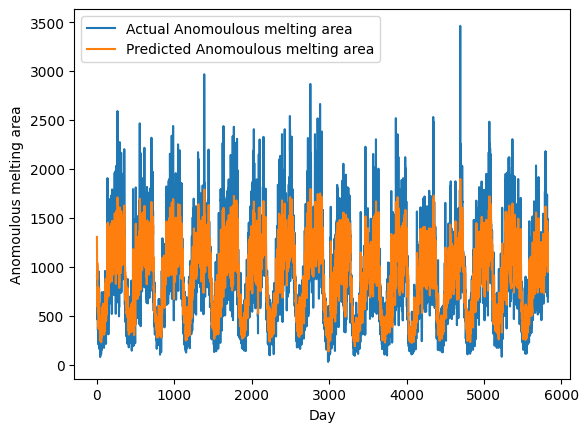

In [57]:
plt.plot(new_y_train, label='Actual Anomoulous melting area')
plt.plot(train_predictions, label='Predicted Anomoulous melting area')
plt.xlabel('Day')
plt.ylabel('Anomoulous melting area')
plt.legend()
plt.show()


In [58]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 847.14877081,  854.31760561,  752.6990549 , ...,  963.31408386,
       1203.7290996 ,  945.88399176])

In [59]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
#dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([-0.61746722, -0.68209606, -0.42183405, ..., -0.23260553,
       -0.54526931, -0.73682678])

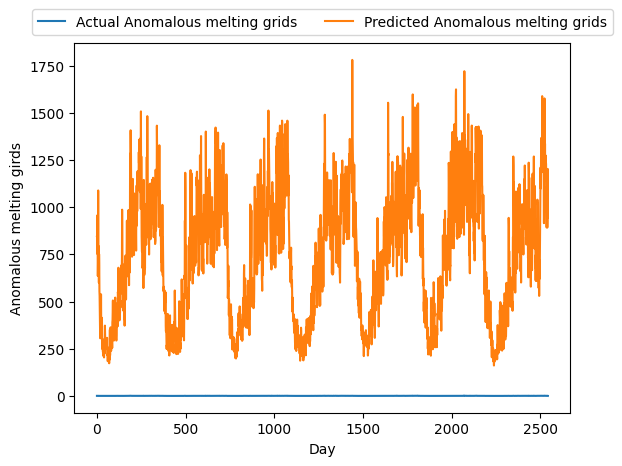

In [60]:
plt.plot(new_y_test, label='Actual Anomalous melting grids')
plt.plot(test_predictions, label='Predicted Anomalous melting grids')
plt.xlabel('Day')
plt.ylabel('Anomalous melting girds')
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=len(grouped))
plt.show()


5827   2015-12-31
5828   2016-01-02
5829   2016-01-03
5830   2016-01-04
5831   2016-01-05
          ...    
8373   2022-12-27
8374   2022-12-28
8375   2022-12-29
8376   2022-12-30
8377   2022-12-31
Name: Date, Length: 2551, dtype: datetime64[ns]


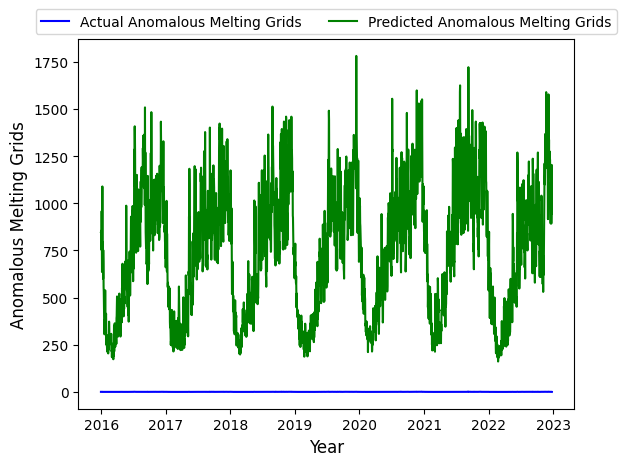

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data1 = {}

data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')


print(data1['Date'])
# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis

fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(new_y_test)], new_y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(test_predictions)], test_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
#ax.legend(loc='upper center', fontsize=12)  # Legend at the upper center
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))
# # Format the x-axis to display years
# date_format = mpl.dates.DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_format)

# # Rotate the x-axis year labels for better readability
# fig.autofmt_xdate()

# # Show the plot
# plt.show()

In [62]:
print(new_y_test)


[-0.61746722 -0.68209606 -0.42183405 ... -0.23260553 -0.54526931
 -0.73682678]


In [63]:
print(test_predictions)

[ 847.14877081  854.31760561  752.6990549  ...  963.31408386 1203.7290996
  945.88399176]


In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample predicted and actual values
predicted_values = test_predictions
actual_values = new_y_test

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared (R2)
r2 = r2_score(actual_values, predicted_values)
print(f"Coefficient of Determination (R-squared, R2): {r2:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 669052.07
Root Mean Squared Error (RMSE): 817.96
Mean Absolute Error (MAE): 747.11
Coefficient of Determination (R-squared, R2): -12344162.62
Mean Absolute Percentage Error (MAPE): 609401.07%
